In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C://Users//Dell_USA//Downloads//drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder

df['Drug']=LabelEncoder().fit_transform(df['Drug'])
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['BP']=LabelEncoder().fit_transform(df['BP'])
df['Cholesterol']=LabelEncoder().fit_transform(df['Cholesterol'])

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [10]:
result = df.copy()
max_value = df['Age'].max()
min_value = df['Age'].min()
result['Age'] = (df['Age'] - min_value) / (max_value - min_value)

max_value = df['BP'].max()
min_value = df['BP'].min()
result['BP'] = (df['BP'] - min_value) / (max_value - min_value)

max_value = df['Cholesterol'].max()
min_value = df['Cholesterol'].min()
result['Cholesterol'] = (df['Cholesterol'] - min_value) / (max_value - min_value)

max_value = df['Na_to_K'].max()
min_value = df['Na_to_K'].min()
result['Na_to_K'] = (df['Na_to_K'] - min_value) / (max_value - min_value)

max_value = df['Drug'].max()
min_value = df['Drug'].min()
result['Drug'] = (df['Drug'] - min_value) / (max_value - min_value)

<Axes: >

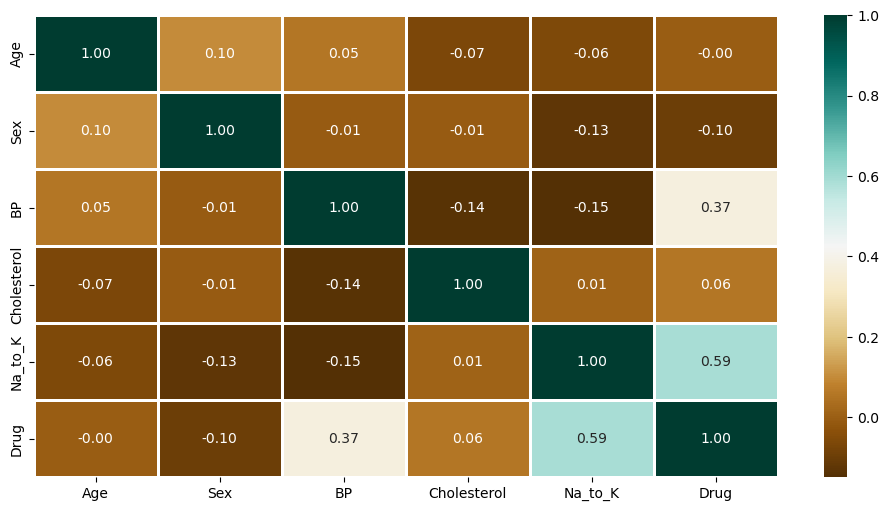

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(result.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [13]:
from sklearn.model_selection import train_test_split
features=["Sex", "BP","Cholesterol", "Na_to_K"]
X=df[features]
y=df.Drug
train_X, test_X, train_y, test_y = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state = 0)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

model1=DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print(metrics.accuracy_score(test_y, pred1))
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

0.95
Mean Absolute Error: 0.050000
